# Plot best structure E^2 or H^2
## Two parameter to adjust
### 1. wavelength_to_observe (in line23)
### 2. select_E_or_H  (in line 25) select E^2(select_E_or_H==0) or H^2(select_E_or_H==1)

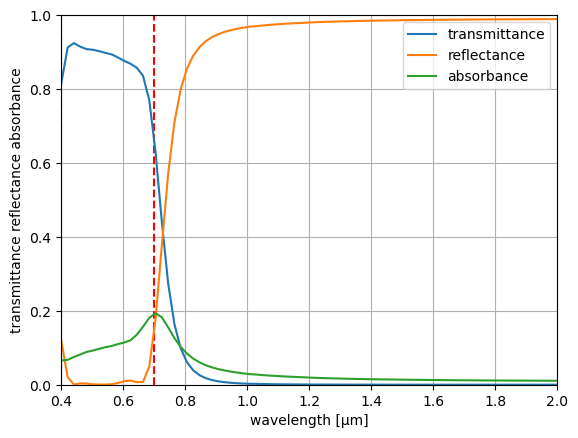

0.8753674171843984
0.9418863013610541


-1.7857759539248745

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from scipy import integrate
import os
import scipy.io as sio

from scipy.signal import fftconvolve
#from dwave.system import DWaveSampler, EmbeddingComposite

import json

import math
import S4
import sys
print_spectrum = 1
print_TR_percent = 1
original_2d_data_0_to_5 = np.random.rand(500, 176) * 5
original_2d_data_0_to_5_x_index = 0
original_2d_data_0_to_5_y_index = 0
# select wavelength to observe micromater
wavelength_to_observe = 0.5
# select E^2(select_E_or_H==0) or H^2(select_E_or_H==1)
select_E_or_H = 1
def n_al2o3(wl):
    nsq = 1 + 1.4313493*wl**2/(wl**2-0.0726631**2) + 0.65054713*wl**2/(wl**2-0.1193242**2) + 5.3414021*wl**2/(wl**2-18.028251**2)
    return (nsq)
def n_sio2(wl):
    nsq = 1 + 0.6961663*wl**2/(wl**2-0.0684043**2) + 0.4079426*wl**2/(wl**2-0.1162414**2) + 0.8974794*wl**2/(wl**2-9.896161**2)
    return (nsq)
def n_hfo2(wl):
    return (np.square(1.875 + 6.28e-3/(wl**2) + 5.8e-4/(wl**4)))



def formula(input_x):
    #S=S4.New(Lattice=((1,0),(0,1)),NumBasis=40)
    S=S4.New(Lattice=((5,0),(0,1)),NumBasis=10)
    #S.SetOptions(PolarizationDecomposition = True)
    pmma_string = 'PMMA'
    sio2_string = 'SiO2'
    sic_string  = 'SiC' 
    #materialの設定
    S.SetMaterial(Name='Vacuum',Epsilon=1)
    S.SetMaterial(Name='Si',Epsilon=3.4**2)
    S.SetMaterial(Name='SiO2',Epsilon=1.5**2)
    S.SetMaterial(Name='SiC',Epsilon=3.0**2)
    S.SetMaterial(Name='PMMA',Epsilon=1.48**2)
    S.SetMaterial(Name='Ag',Epsilon=5**2)
    S.SetMaterial(Name='HfO2',Epsilon=5**2)
    S.SetMaterial(Name='Al2O3',Epsilon=5**2)
    #レイヤーを設定今回は3つのレイヤー。
    S.AddLayer(Name='Level0',Thickness=0.0, Material='Vacuum')
    S.AddLayer(Name='Level1',Thickness=0.04, Material='HfO2')
    S.AddLayer(Name='Level2',Thickness=0.012, Material='Ag')
    S.AddLayer(Name='Level3',Thickness=0.06, Material='HfO2')
    S.AddLayer(Name='Level4',Thickness=0.006, Material='Ag')
    S.AddLayer(Name='Level5',Thickness=0.01, Material='SiO2')
    S.AddLayer(Name='Level6',Thickness=0.04, Material='HfO2')
    S.AddLayer(Name='Level7',Thickness=0.006, Material='Ag')
    S.AddLayer(Name='Level8',Thickness=0.01, Material='SiO2')
    S.AddLayer(Name='Level9',Thickness=0.02, Material='HfO2')
    S.AddLayer(Name='Level10',Thickness=0.01, Material='Al2O3')
    S.AddLayer(Name='Level11',Thickness=0.006, Material='Ag')
    S.AddLayer(Name='Level12',Thickness=0.01, Material='SiO2')
    S.AddLayer(Name='Level13',Thickness=0.01, Material='Al2O3')
    S.AddLayer(Name='Level14',Thickness=0.02, Material='HfO2')
    S.AddLayer(Name='Level15',Thickness=0.02, Material='SiO2')
    S.AddLayer(Name='Level16',Thickness=0.02, Material='HfO2')
    S.AddLayer(Name='Level17',Thickness=0.012, Material='Ag')
    S.AddLayer(Name='Level18',Thickness=0.04, Material='HfO2')

    S.AddLayer(Name='Air',Thickness=0.0,Material='Vacuum')
    #S.AddLayerCopy(Name = 'Air', Thickness = 0.0, Layer = 'Level0')
    
    
    #波長範囲を設定
    wavelength_array=np.linspace(0.4,2,80)
    #print(wavelength_array)
    wavelength_array_inside = [0.4      , 0.42025316, 0.44050633, 0.46075949, 0.48101266,
                               0.50126582, 0.52151899, 0.54177215, 0.56202532, 0.58227848,
                               0.60253165, 0.62278481, 0.64303797, 0.66329114, 0.6835443,  0.70379747 ]
    wavelength_array_outside1 = [0.72405063 ,0.7443038
                                ,0.76455696 ,0.78481013, 0.80506329, 0.82531646, 0.84556962, 0.86582278
                                ,0.88607595 ,0.90632911, 0.92658228, 0.94683544, 0.96708861, 0.98734177
                                ,1.00759494 ,1.0278481 , 1.04810127, 1.06835443, 1.08860759, 1.10886076
                                ,1.12911392 ,1.14936709, 1.16962025, 1.18987342, 1.21012658, 1.23037975
                                ,1.25063291 ,1.27088608, 1.29113924, 1.31139241, 1.33164557, 1.35189873
                                ,1.3721519  ,1.39240506, 1.41265823, 1.43291139, 1.45316456, 1.47341772
                                ,1.49367089 ,1.51392405, 1.53417722, 1.55443038, 1.57468354, 1.59493671
                                ,1.61518987 ,1.63544304, 1.6556962 , 1.67594937, 1.69620253, 1.7164557
                                ,1.73670886 ,1.75696203, 1.77721519, 1.79746835, 1.81772152, 1.83797468
                                ,1.85822785 ,1.87848101, 1.89873418, 1.91898734, 1.93924051, 1.95949367
                                ,1.97974684 ,2.0        ]
    Planck_array = np.array( [72203 , 100131, 133343, 171499, 214049,
                                       260285, 309395, 360519, 412793, 465387,
                                       517531, 568535, 617802, 664829, 709210,
                                       750632, 788866, 823761, 855234, 883262,
                                       907872, 929131, 947141, 962029, 973942,
                                       983041, 989499, 993489, 995191, 994782,
                                       992435, 988321, 982603, 975436, 966971,
                                       957346, 946694, 935139, 922796,
                                       909770, 889167, 874851, 860165, 845182,
                                       829968, 814583, 799083, 783516, 767926, 
                                       752353, 736833, 721398, 706074, 690887, 
                                       675859, 661007, 646350, 631899, 617669,
                                       603668, 589905, 576386, 563118, 550104,
                                       537348, 524850, 512613, 500637, 488921,
                                       477464, 466265, 455321, 444631, 434190,
                                       423997, 414047, 404336, 394862, 385619,
                                       372180])
    Planck_normalized_array = Planck_array#/9.95282
    
    #効率計算結果用アレイ
    efficiency_array=[]
    reflected_flux_array = []
    emissive_array = []
    reflected_flux_array_outside1 = []
    reflected_flux_array_outside2 = []
    reflected_flux_array_inside = []
    efficiency_array_outside = []
    reflected_flux_outside  = []
    efficiency_array_inside = []
    reflected_flux_inside = [] 
    

    SiC_array = [11.959+ 4.7869j
    ,11.893+ 4.3625j
    ,11.851+ 4.0079j
    ,11.816+ 3.6938j
    ,11.794+ 3.3971j
    ,11.756+ 3.1279j
    ,11.714+ 2.8820j
    ,11.665+ 2.6576j
    ,11.614+ 2.4576j
    ,11.561+ 2.2745j
    ,11.510+ 2.1070j
    ,11.456+ 1.9535j
    ,11.393+ 1.8099j
    ,11.337+ 1.6870j
    ,11.281+ 1.5770j
    ,11.227+ 1.4723j
    ,11.179+ 1.3799j
    ,11.128+ 1.2891j
    ,11.082+ 1.2112j
    ,11.036+ 1.1316j
    ,10.982+ 1.0604j
    ,10.932+ 1.0079j
    ,10.898+ 0.9507j
    ,10.846+ 0.9045j
    ,10.815+ 0.8471j
    ,10.776+ 0.8223j
    ,10.759+ 0.7672j
    ,10.726+ 0.7301j
    ,10.689+ 0.6723j
    ,10.655+ 0.6473j
    ,10.620+ 0.6224j
    ,10.586+ 0.5976j
    ,10.552+ 0.5728j
    ,10.525+ 0.5513j
    ,10.504+ 0.5325j
    ,10.483+ 0.5137j
    ,10.462+ 0.4949j
    ,10.441+ 0.4762j
    ,10.420+ 0.4575j
    ,10.403+ 0.4402j
    ,10.378+ 0.4150j
    ,10.362+ 0.3983j
    ,10.346+ 0.3816j
    ,10.330+ 0.3649j
    ,10.313+ 0.3483j
    ,10.297+ 0.3317j
    ,10.283+ 0.3206j
    ,10.269+ 0.3098j
    ,10.256+ 0.2990j
    ,10.242+ 0.2882j
    ,10.228+ 0.2774j
    ,10.214+ 0.2667j
    ,10.201+ 0.2559j
    ,10.187+ 0.2452j
    ,10.173+ 0.2345j
    ,10.161+ 0.2262j
    ,10.151+ 0.2197j
    ,10.141+ 0.2132j
    ,10.131+ 0.2068j
    ,10.121+ 0.2003j
    ,10.111+ 0.1939j
    ,10.101+ 0.1874j
    ,10.091+ 0.1810j
    ,10.081+ 0.1746j
    ,10.071+ 0.1682j
    ,10.061+ 0.1618j
    ,10.051+ 0.1554j
    ,10.041+ 0.1491j
    ,10.032+ 0.1438j
    ,10.023+ 0.1385j
    ,10.014+ 0.1333j
    ,10.006+ 0.1280j
    ,9.9969+ 0.1227j
    ,9.9881+ 0.1175j
    ,9.9794+ 0.1123j
    ,9.9711+ 0.1084j
    ,9.9631+ 0.1052j
    ,9.9552+ 0.1020j
    ,9.9472+ 0.0988j
    ,9.9352+ 0.0941j ]


    
    Ag_array= [-4.5730+0.23090j
    ,-5.6067+0.23916j
    ,-6.6569+0.26761j
    ,-7.7231+0.28956j
    ,-8.8055+0.31331j
    ,-9.9352+0.32785j
    ,-11.090+0.34592j
    ,-12.289+0.36117j
    ,-13.543+0.36946j
    ,-14.821+0.38399j
    ,-16.151+0.39432j
    ,-17.535+0.40347j
    ,-18.957+0.42822j
    ,-20.420+0.45177j
    ,-21.924+0.47418j
    ,-23.468+0.49476j
    ,-25.059+0.51481j
    ,-26.693+0.53629j
    ,-28.375+0.55852j
    ,-30.100+0.58312j
    ,-31.866+0.61038j
    ,-33.683+0.63822j
    ,-35.549+0.67139j
    ,-37.465+0.70572j
    ,-39.431+0.74107j
    ,-41.420+0.78426j
    ,-43.458+0.82865j
    ,-45.545+0.87425j
    ,-47.674+0.92080j
    ,-49.850+0.96840j
    ,-52.074+ 1.0172j
    ,-53.460+ 1.0477j
    ,-55.726+ 1.1005j
    ,-58.023+ 1.1600j
    ,-60.367+ 1.2209j
    ,-62.757+ 1.2833j
    ,-65.194+ 1.3472j
    ,-67.662+ 1.4124j
    ,-70.16 + 1.4790j
    ,-72.720+ 1.5471j
    ,-76.633+ 1.6519j
    ,-79.299+ 1.7237j
    ,-82.011+ 1.7961j
    ,-84.770+ 1.8692j
    ,-87.574+ 1.9437j
    ,-90.417+ 2.0197j
    ,-93.284+ 2.0975j
    ,-96.196+ 2.1768j
    ,-99.152+ 2.2574j
    ,-102.17+ 2.3447j
    ,-105.25+ 2.4370j
    ,-108.37+ 2.5310j
    ,-111.54+ 2.6267j
    ,-114.74+ 2.7251j
    ,-117.96+ 2.8261j
    ,-121.23+ 2.9289j
    ,-124.54+ 3.0334j
    ,-127.90+ 3.1397j
    ,-131.30+ 3.2501j
    ,-134.75+ 3.3624j
    ,-138.24+ 3.4765j
    ,-141.78+ 3.5924j
    ,-145.36+ 3.7101j
    ,-149.02+ 3.8350j
    ,-152.72+ 3.9628j
    ,-156.47+ 4.0926j
    ,-160.27+ 4.2244j
    ,-164.11+ 4.3581j
    ,-168.00+ 4.4938j
    ,-171.87+ 4.6422j
    ,-175.79+ 4.7935j
    ,-179.74+ 4.9470j
    ,-183.75+ 5.1026j
    ,-187.80+ 5.2605j
    ,-191.89+ 5.4206j
    ,-196.02+ 5.5846j
    ,-200.20+ 5.7602j
    ,-204.42+ 5.9382j
    ,-208.69+ 6.1187j
    ,-215.17+ 6.3940j]
    
    SiO2_array =[2.2025+0.0j
    ,2.1968+0.0j
    ,2.1920+0.0j
    ,2.1878+0.0j
    ,2.1841+0.0j
    ,2.1809+0.0j
    ,2.1781+0.0j           
    ,2.1755+0.0j          
    ,2.1733+0.0j          
    ,2.1713+0.0j
    ,2.1695+0.0j
    ,2.1679+0.0j
    ,2.1664+0.0j
    ,2.1650+0.0j
    ,2.1638+0.0j
    ,2.1627+0.0j
    ,2.1617+0.0j
    ,2.1608+0.0j
    ,2.1599+0.0j
    ,2.1591+0.0j
    ,2.1584+0.0j
    ,2.1577+0.0j
    ,2.1571+0.0j
    ,2.1565+0.0j
    ,2.1559+0.0j
    ,2.1553+0.0j
    ,2.1547+0.0j
    ,2.1541+0.0j
    ,2.1535+0.0j
    ,2.1529+0.0j
    ,2.1523+0.0j
    ,2.1517+0.0j
    ,2.1511+0.0j
    ,2.1505+0.0j
    ,2.1499+0.0j
    ,2.1493+0.0j
    ,2.1487+0.0j
    ,2.1481+0.0j
    ,2.1475+0.0j
    ,2.1471+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j
    ,2.1467+0.0j ] 

    SiO2_array_index = 0
    SiC_array_index = 0
    Ag_array_index = 0
    HfO2_array_index = 0
    Al2O3_array_index = 0
    Al_array_index = 0
    Planck_normalized_array_index = 0
    for wavelength in wavelength_array:
       
        S.SetMaterial(Name='SiO2',Epsilon=SiO2_array[SiO2_array_index])
        SiO2_array_index = SiO2_array_index + 1
        S.SetMaterial(Name='SiC',Epsilon=SiC_array[SiC_array_index])
        SiC_array_index = SiC_array_index + 1
        S.SetMaterial(Name='Ag',Epsilon=Ag_array[Ag_array_index])
        Ag_array_index = Ag_array_index + 1
        S.SetMaterial(Name='HfO2',Epsilon=n_hfo2(wavelength))
        HfO2_array_index = HfO2_array_index + 1
        S.SetMaterial(Name='Al2O3',Epsilon=n_al2o3(wavelength))
        Al2O3_array_index = Al2O3_array_index + 1
        
        S.SetFrequency((1/wavelength))
    
        #入射角0度のs偏光平面波を入射する。
        S.SetExcitationPlanewave(IncidenceAngles=(0,0),sAmplitude=0,pAmplitude=1)
        
        #入射フラックスを取得
        (P_incident,P_reflect)=S.GetPowerFlux(Layer='Level0')
        
        #各次数の透過フラックスを取得
        #P_transmittance=S.GetPowerFluxByOrder(Layer='Air')
        (P_air_transmittance,P_air_reflect) =S.GetPowerFlux(Layer='Air')
        #1次回折光の効率になおす。
        #efficiency=(P_transmittance[1][0]/P_incident).real
        #Note that efficiency => transmittance
        efficiency=(P_air_transmittance/P_incident).real
        #efficiency=-(P_reflect/P_incident).real
        #アレイに追加。
        efficiency_array.append(efficiency)
        reflected_flux = (-(P_reflect/P_incident)).real
        reflected_flux_array.append(reflected_flux)
        #emissive = (1-((P_incident + P_reflect - P_air_transmittance)/P_incident)).real
        emissive = (1 - efficiency - reflected_flux )
        #emissive = ( efficiency)
        emissive_array.append(emissive)
        
        if(0.71<=wavelength<=2):
            reflected_flux_array_outside1.append((emissive)*Planck_normalized_array[Planck_normalized_array_index])
            efficiency_array_outside.append(efficiency)
            reflected_flux_outside.append(reflected_flux)
        elif(0<wavelength<0.71):
            reflected_flux_array_inside.append((emissive)*Planck_normalized_array[Planck_normalized_array_index])
            efficiency_array_inside.append(efficiency)
            reflected_flux_inside.append(reflected_flux)
        if(wavelength_to_observe<wavelength<wavelength_to_observe+0.01):
            for original_2d_data_0_to_5_x_index in range(500):
                for original_2d_data_0_to_5_y_index in range(176):
                    E0,H0 = S.GetFields(-0.5+0.002*original_2d_data_0_to_5_x_index, 0,0+0.002*original_2d_data_0_to_5_y_index )
                    #here we can choose (Ex) or Ey or (Ez) or sum up or Hx (Hy) Hz
                    if(select_E_or_H==0):
                        original_2d_data_0_to_5[original_2d_data_0_to_5_x_index, original_2d_data_0_to_5_y_index]=(abs(E0[0])**2+abs(E0[1])**2+abs(E0[2])**2)
                    elif(select_E_or_H==1):
                        original_2d_data_0_to_5[original_2d_data_0_to_5_x_index, original_2d_data_0_to_5_y_index]=(abs(H0[0])**2+abs(H0[1])**2+abs(H0[2])**2)

        Planck_normalized_array_index = Planck_normalized_array_index +1
        #進捗表示。
        #sys.stdout.write(f"\r wavelength={wavelength} eff={emissive}")
        #sys.stdout.flush()
    
    #matplotlibで表示
    if(print_spectrum):
        plt.grid()
        plt.xlabel('wavelength [μm]')
        plt.ylabel('transmittance reflectance absorbance')
        plt.vlines(x = 0.4, ymin = 0, ymax = 1, colors = 'purple',linestyle='dashed')
        plt.vlines(x = 0.7, ymin = 0, ymax = 1, colors = 'red',linestyle='dashed')
        plt.plot(wavelength_array,efficiency_array , label = 'transmittance')
        plt.plot(wavelength_array,reflected_flux_array, label = 'reflectance')
        plt.plot(wavelength_array,emissive_array, label = 'absorbance')
        plt.xlim([0.4,2])
        plt.ylim([0,1])
        plt.legend()
        plt.show()
    
    planck_1_8 = 20.5066#/9.95282
    planck_8_13 = 47.1002#/9.95282
    planck_13_20 = 40.2612#/9.95282
    planck_inside =  120571
    planck_outside = 954989 
    planck_all_window = integrate.simps(Planck_normalized_array, wavelength_array)
    all_window = integrate.simps(emissive_array, wavelength_array)
    insidewindows = integrate.simps(reflected_flux_array_inside, wavelength_array_inside)
    outsidewindows1 = integrate.simps(reflected_flux_array_outside1, wavelength_array_outside1)
    
    insidewindows_T = integrate.simps(efficiency_array_inside, wavelength_array_inside)
    outsidewindows1_T = integrate.simps(efficiency_array_outside, wavelength_array_outside1)
    insidewindows_R = integrate.simps(reflected_flux_inside, wavelength_array_inside)
    outsidewindows1_R = integrate.simps(reflected_flux_outside, wavelength_array_outside1)
    if(print_TR_percent):
        print(insidewindows_T/0.303 )
        print(outsidewindows1_R/1.297)
    return (-(insidewindows_T/0.303 - outsidewindows1_T/1.297+ outsidewindows1_R/1.297 - insidewindows_R/0.303))
formula([0,1])
        

原始 2D 陣列已成功儲存到 '2d_data_array.npy'。

已成功從 '2d_data_array.npy' 讀取陣列。
讀取後的陣列形狀: (500, 176)


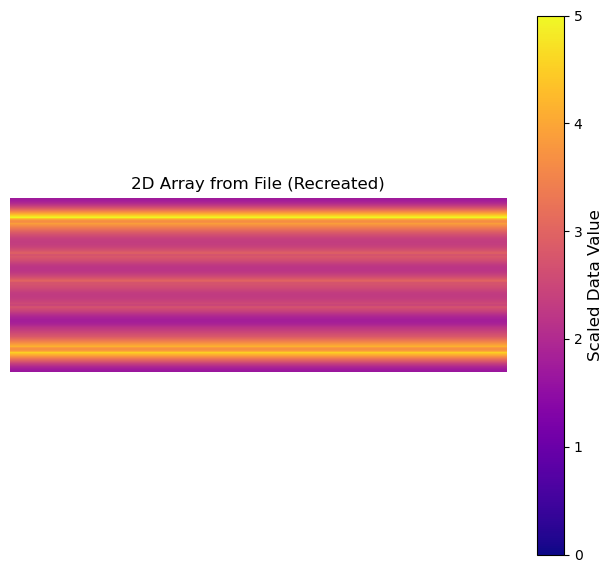

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os

# --- 1. 範例陣列創建與儲存 ---

# 創建原始 2D 陣列 (這裡使用模擬的數據，因為你的程式碼中沒有完整的定義)
# 假設你的 original_2d_data_0_to_5 已經被計算出來
# 這裡我們模擬一個 (176, 500) 的隨機陣列，範圍在 0 到 5 之間
#original_2d_data_0_to_5 = np.random.rand(176, 500) * 5

# 定義要儲存的檔案名稱
output_np_file = '2d_data_array.npy'

# 將 NumPy 陣列儲存到 .npy 檔案
try:
    np.save(output_np_file, original_2d_data_0_to_5)
    print(f"原始 2D 陣列已成功儲存到 '{output_np_file}'。")
except Exception as e:
    print(f"儲存檔案時發生錯誤：{e}")
    exit() # 如果儲存失敗，則終止程式

# --- 2. 讀取陣列並重現圖表 ---

def recreate_plot_from_file(file_path):
    """
    從 .npy 檔案中讀取 2D 陣列，並根據原始繪圖邏輯重現圖表。
    
    Args:
        file_path (str): .npy 檔案的路徑。
    """
    try:
        # 從 .npy 檔案讀取陣列
        reloaded_array = np.load(file_path)
        print(f"\n已成功從 '{file_path}' 讀取陣列。")
        print(f"讀取後的陣列形狀: {reloaded_array.shape}")
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 '{file_path}'。")
        return
    except Exception as e:
        print(f"讀取檔案時發生錯誤：{e}")
        return

    # 由於你的原始程式碼中對陣列進行了轉置（.T），我們也進行同樣的操作
    reloaded_array = reloaded_array.T

    # 將 0-5 的數值範圍正規化到 0-1
    # 假設原始數據的最大值是 5.0
    normalized_data = reloaded_array / reloaded_array.max()
    
    # 使用 Colormap 將正規化後的數據轉換為 RGB 顏色
    # 我們選擇與你原始程式碼相同的 'plasma' colormap
    colored_data_rgba = cm.plasma(normalized_data)
    rgb_image_data = (colored_data_rgba[:, :, :3] * 255).astype(np.uint8)

    # 使用 Matplotlib 繪製圖像並添加 Color Bar
    plt.figure(figsize=(8, 7))
    plt.imshow(rgb_image_data)
    plt.title("2D Array from File (Recreated)")
    plt.axis('off')

    # 添加 Color Bar
    cbar = plt.colorbar(cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=5)),
                        ax=plt.gca(),
                        ticks=np.linspace(0, 5, 6),
                        label='Scaled Data Value')
    cbar.set_label('Scaled Data Value', fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    # 顯示圖表
    plt.show()

# 執行讀取並重現圖表的功能
recreate_plot_from_file(output_np_file)

--- 原始 2D 陣列資訊 ---
原始 2D 陣列的形狀: (500, 176)
原始 2D 陣列的數據類型: float64
原始 2D 陣列的最小值: 0.9119, 最大值: 2.7616

--- 正規化後數據資訊 ---
正規化後數據的最小值: 0.3302, 最大值: 1.0000

--- 彩色圖像數據資訊 ---
彩色圖像數據的形狀: (176, 500, 3)
彩色圖像數據的數據類型: uint8
彩色圖像數據的最小值: 21, 最大值: 253

彩色圖像（含 Color Bar）已成功保存為 'output_2d_color_scaled_image_with_colorbarv2.jpg'


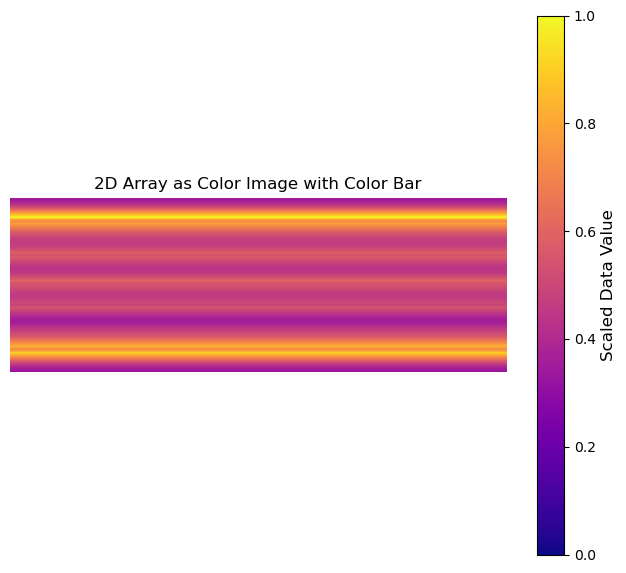

In [3]:
import numpy as np
from PIL import Image
import matplotlib.cm as cm # 導入 matplotlib 的 colormap 模組
import matplotlib.pyplot as plt # 導入 matplotlib 的繪圖模組

# --- 1. 創建一個範例 Python 2D 陣列 (數值介於 0 到 5 之間) ---
width, height = 500, 176 # 定義圖像的寬度和高度

# 創建一個 2D 陣列，並填充介於 0 到 5 之間的隨機浮點數
# 這裡使用 np.random.rand() 生成 0 到 1 的數值，然後乘以 5 得到 0 到 5 的範圍
#original_2d_data_0_to_5 = np.random.rand(height, width) * 5

print("--- 原始 2D 陣列資訊 ---")
print(f"原始 2D 陣列的形狀: {original_2d_data_0_to_5.shape}")
print(f"原始 2D 陣列的數據類型: {original_2d_data_0_to_5.dtype}")
print(f"原始 2D 陣列的最小值: {original_2d_data_0_to_5.min():.4f}, 最大值: {original_2d_data_0_to_5.max():.4f}")
original_2d_data_0_to_5 = original_2d_data_0_to_5.T
# --- 2. 將 0-5 的數值範圍正規化到 0-1 ---
# Colormap 通常期望輸入值在 0 到 1 之間。
# 這裡我們假設原始數據的最大理論值是 5.0。
normalized_data = original_2d_data_0_to_5 / original_2d_data_0_to_5.max()

print("\n--- 正規化後數據資訊 ---")
print(f"正規化後數據的最小值: {normalized_data.min():.4f}, 最大值: {normalized_data.max():.4f}")

# --- 3. 使用 Colormap 將正規化後的數據轉換為 RGB 顏色 ---
# 選擇一個 Colormap。'viridis' 是一個常用的、感知均勻的 Colormap，
# 它能將數值映射到一系列不同的顏色，使色階差異更明顯。
# 其他選項包括 'jet', 'turbo', 'plasma', 'magma' 等。
# .cmap() 方法會返回一個 RGBA 陣列 (Red, Green, Blue, Alpha)，其中每個通道的值在 0-1 之間。
colored_data_rgba = cm.plasma(normalized_data)

# 我們只需要 RGB 通道，並且需要將其縮放到 0-255 並轉換為 np.uint8 類型。
# colored_data_rgba[:, :, :3] 選擇 RGB 通道
# * 255 將值從 0-1 縮放到 0-255
# .astype(np.uint8) 轉換數據類型
rgb_image_data = (colored_data_rgba[:, :, :3] * 255).astype(np.uint8)

print("\n--- 彩色圖像數據資訊 ---")
print(f"彩色圖像數據的形狀: {rgb_image_data.shape}")
print(f"彩色圖像數據的數據類型: {rgb_image_data.dtype}")
print(f"彩色圖像數據的最小值: {rgb_image_data.min()}, 最大值: {rgb_image_data.max()}")


# --- 4. 使用 Matplotlib 繪製圖像並添加 Color Bar ---
output_filename = "output_2d_color_scaled_image_with_colorbarv2.jpg"

plt.figure(figsize=(8, 7)) # 設置圖形大小，以便容納圖像和 Color Bar
plt.imshow(rgb_image_data) # 顯示彩色圖像數據
plt.title("2D Array as Color Image with Color Bar") # 設置圖片標題
plt.axis('off') # 關閉座標軸

# 添加 Color Bar
# mappable 參數指向 imshow 返回的對象，以便 colorbar 知道如何映射顏色
# ticks 參數可以指定 Color Bar 上顯示的刻度
# label 參數設置 Color Bar 的標籤
# extend 參數可以根據需要設置為 'both', 'min', 'max'
# 為了讓 Color Bar 的範圍對應原始數據 0-5，我們需要傳遞 vmin 和 vmax 給 imshow
# 但由於我們已經將數據映射到 0-255 的 RGB 值，imshow 不直接知道原始範圍。
# 我們可以手動設置 Color Bar 的 ticks 和 label。
cbar = plt.colorbar(cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1)),
                    ax=plt.gca(), # 將 Color Bar 放置在當前軸上
                    ticks=np.linspace(0, 1, 6), # 設置刻度為 0, 1, 2, 3, 4, 5
                    label='Scaled Data Value')

# 調整 Color Bar 標籤的字體大小
cbar.set_label('Scaled Data Value', fontsize=12)
cbar.ax.tick_params(labelsize=10) # 調整刻度標籤字體大小


# 保存圖形為 JPG 檔案
try:
    plt.savefig(output_filename, bbox_inches='tight', dpi=300) # bbox_inches='tight' 確保所有元素都被包含
    print(f"\n彩色圖像（含 Color Bar）已成功保存為 '{output_filename}'")
except Exception as e:
    print(f"保存圖像時發生錯誤: {e}")

# 如果您在本地運行，可以取消註釋下一行來顯示圖片視窗
# plt.show()

# --- 5. 將 NumPy RGB 陣列轉換為 Pillow 圖像對象 (此部分不再用於保存，僅為兼容性保留) ---
# 對於形狀為 (H, W, 3) 且數據類型為 np.uint8 的陣列，
# Pillow 的 Image.fromarray() 會自動識別為 'RGB' 模式。
# 由於我們現在使用 matplotlib 保存整個圖形，以下 PIL 保存步驟不再是主要輸出。
# 但如果您仍需要單獨的圖像數據（不含colorbar），可以保留此部分。
# try:
#     image_color_pil = Image.fromarray(rgb_image_data)
#     # print("\n成功將 NumPy RGB 陣列轉換為 Pillow 圖像對象。")
#     # output_filename_pil = "output_2d_color_image_only_pil.jpg"
#     # image_color_pil.save(output_filename_pil)
#     # print(f"單獨的彩色圖像（無 Color Bar）已成功保存為 '{output_filename_pil}'")
# except Exception as e:
#     print(f"轉換或保存單獨圖像時發生錯誤: {e}")

# 您可以在執行此程式碼後，在與程式碼相同的目錄中找到生成的 JPG 檔案。